Text(0, 0.5, 'log')

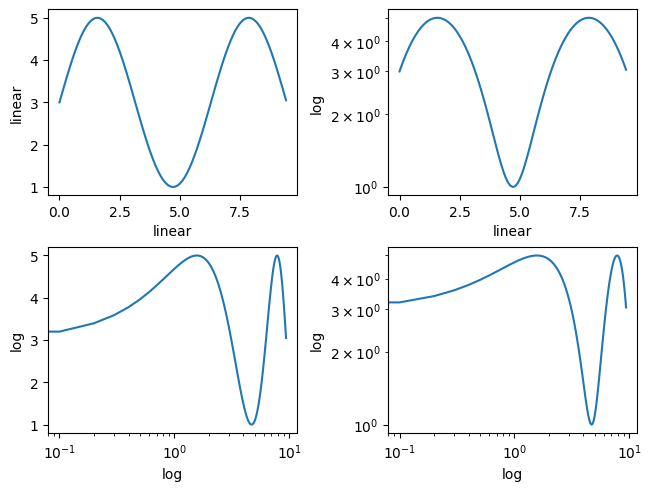

In [3]:
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.scale as mscale
from matplotlib.ticker import FixedLocator, NullFormatter

fig, axs = plt.subplot_mosaic([['linear', 'linear-log'],
                               ['log-linear', 'log-log']], layout='constrained')

x = np.arange(0, 3 * np.pi, 0.1)
y = 2 * np.sin(x) + 3

ax = axs['linear']
ax.plot(x, y)
ax.set_xlabel('linear')
ax.set_ylabel('linear')

ax = axs['linear-log']
ax.plot(x, y)
ax.set_yscale('log')
ax.set_xlabel('linear')
ax.set_ylabel('log')

ax = axs['log-linear']
ax.plot(x, y)
ax.set_xscale('log')
ax.set_xlabel('log')
ax.set_ylabel('log')

ax = axs['log-log']
ax.plot(x, y)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('log')
ax.set_ylabel('log')

Text(0.5, 1.0, 'loglog(x, y)')

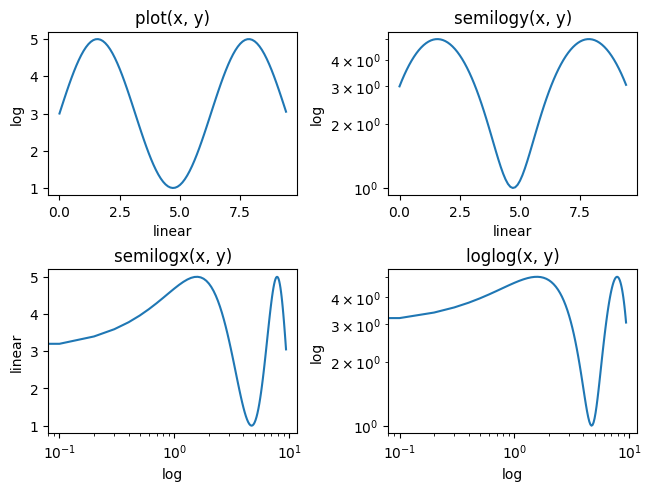

In [4]:
# loglog and semilogx/y

fig, axs = plt.subplot_mosaic([['linear', 'linear-log'],
                               ['log-linear', 'log-log']], layout = 'constrained')

x = np.arange(0, 3*np.pi, 0.1)
y = 2 * np.sin(x) + 3

ax = axs['linear']
ax.plot(x, y)
ax.set_xlabel('linear')
ax.set_ylabel('log')
ax.set_title('plot(x, y)')

ax = axs['linear-log']
ax.semilogy(x, y)
ax.set_xlabel('linear')
ax.set_ylabel('log')
ax.set_title('semilogy(x, y)')

ax = axs['log-linear']
ax.semilogx(x, y)
ax.set_xlabel('log')
ax.set_ylabel('linear')
ax.set_title('semilogx(x, y)')

ax = axs['log-log']
ax.loglog(x, y)
ax.set_xlabel('log')
ax.set_ylabel('log')
ax.set_title('loglog(x, y)')

In [5]:
print(mscale.get_scale_names())

['asinh', 'function', 'functionlog', 'linear', 'log', 'logit', 'symlog']


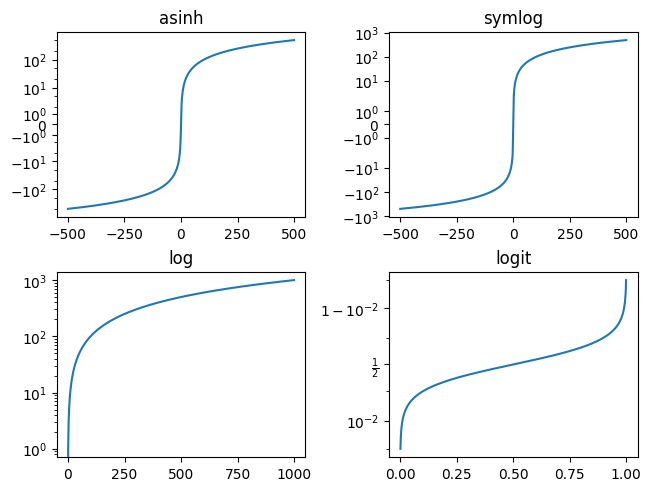

In [6]:
fig, axs = plt.subplot_mosaic([['asinh', 'symlog'],
                               ['log', 'logit']], layout='constrained')

x = np.arange(0, 1000)

for name, ax in axs.items():
    if name in ['asinh', 'symlog']:
        yy = x - np.mean(x)
    elif name in ['logit']:
        yy = (x-np.min(x))
        yy = yy / np.max(np.abs(yy))
    else:
        yy = x

    ax.plot(yy, yy)
    ax.set_yscale(name)
    ax.set_title(name)

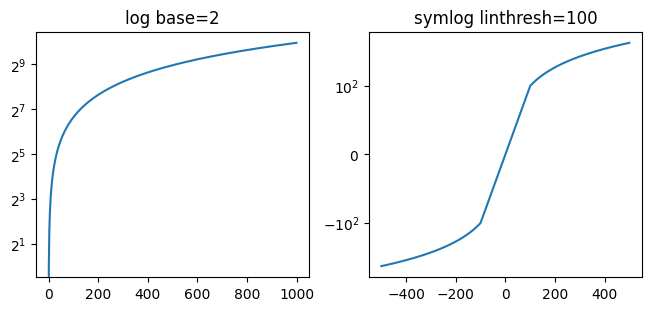

In [7]:
# Optional arguments for scales

fig, axs = plt.subplot_mosaic([['log', 'symlog']], layout='constrained',
                              figsize=(6.4, 3))

for name, ax in axs.items():
    if name in ['log']:
        ax.plot(x, x)
        ax.set_yscale('log', base=2)
        ax.set_title('log base=2')
    else:
        ax.plot(x - np.mean(x), x - np.mean(x))
        ax.set_yscale('symlog', linthresh=100)
        ax.set_title('symlog linthresh=100')

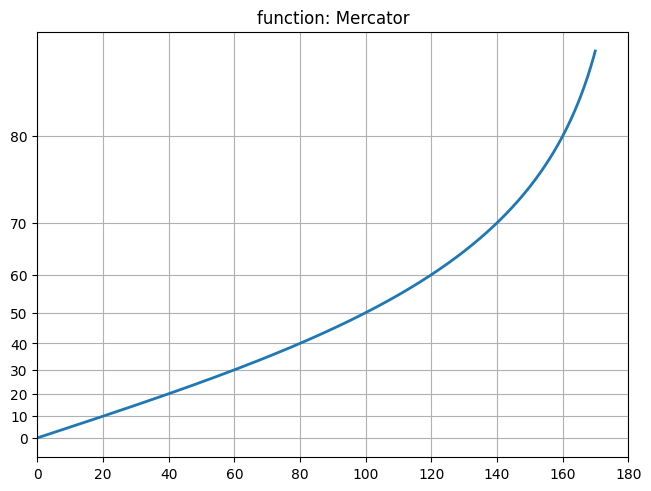

In [8]:
# Arbitrary function scales
# Function Mercator trnasform

def forward(a):
    a = np.deg2rad(a)
    return np.rad2deg(np.log(np.abs(np.tan(a) + 1.0 / np.cos(a))))

def inverse(a):
    a = np.deg2rad(a)
    return np.rad2deg(np.arctan(np.sinh(a)))

t = np.arange(0, 170.0, 0.1)
s = t / 2.

fig, ax = plt.subplots(layout='constrained')
ax.plot(t, s, '-', lw=2)

ax.set_yscale('function', functions=(forward, inverse))
ax.set_title('function: Mercator')
ax.grid(True)
ax.set_xlim([0, 180])
ax.yaxis.set_minor_formatter(NullFormatter())
ax.yaxis.set_major_locator(FixedLocator(np.arange(0, 90, 10)))

linear
log


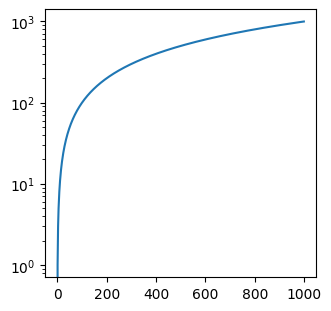

In [9]:
# What is a "scale"?

fig, ax = plt.subplots(layout='constrained',
                       figsize=(3.2, 3))
ax.semilogy(x, x)

print(ax.xaxis.get_scale())
print(ax.yaxis.get_scale())

In [10]:
print(ax.yaxis.get_transform())

LogTransform(base=10, nonpositive='clip')


In [11]:
print('X axis')
print(ax.xaxis.get_major_locator())
print(ax.xaxis.get_major_formatter())

print('Y axis')
print(ax.yaxis.get_major_locator())
print(ax.yaxis.get_major_formatter())

X axis
Y axis
